<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

df['text'].head()

<ipython-input-3-e599d8470047>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


0    Once she asked for daddy, but went back to sle...
1    The medication they were giving her to clear u...
2        You can sit up, but you have to stay in there
3    She met his gaze defiantly for a moment longer...
4    If it's something we simply can't afford, that...
Name: text, dtype: object

In [4]:

X = df['text']
y = df['label']


In [5]:

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
 X, y,
 test_size=0.2,
 random_state=42)

In [6]:
pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.0 MB/s eta 0:00:00


In [7]:
pip install scikeras

In [10]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [11]:

embedding = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)

In [12]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(Dense(20,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 20)                10260     
                                                                 
 dense_1 (Dense)             (None, 6)                 126       
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 256808243 (979.65 MB)
Trainable params: 256808243 (979.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])

In [14]:
history = model.fit(xtrain, ytrain,  shuffle= True, epochs=10 ,batch_size= 64, validation_data=(xtest, ytest))

Epoch 1/10
25/25 [==============================] - 109s 3s/step - loss: 0.6627 - accuracy: 0.5769 - val_loss: 0.6120 - val_accuracy: 0.7300
Epoch 2/10
25/25 [==============================] - 27s 1s/step - loss: 0.5115 - accuracy: 0.8400 - val_loss: 0.4594 - val_accuracy: 0.8500
Epoch 3/10
25/25 [==============================] - 18s 716ms/step - loss: 0.2731 - accuracy: 0.9513 - val_loss: 0.3446 - val_accuracy: 0.8675
Epoch 4/10
25/25 [==============================] - 9s 373ms/step - loss: 0.0860 - accuracy: 0.9925 - val_loss: 0.2975 - val_accuracy: 0.8925
Epoch 5/10
25/25 [==============================] - 9s 359ms/step - loss: 0.0311 - accuracy: 0.9969 - val_loss: 0.3602 - val_accuracy: 0.8650
Epoch 6/10
25/25 [==============================] - 6s 232ms/step - loss: 0.0189 - accuracy: 0.9975 - val_loss: 0.3338 - val_accuracy: 0.8875
Epoch 7/10
25/25 [==============================] - 5s 203ms/step - loss: 0.0149 - accuracy: 0.9975 - val_loss: 0.3711 - val_accuracy: 0.8825
Epoch 8/

In [15]:
model.evaluate(xtest, ytest)

13/13 [==============================] - 0s 10ms/step - loss: 0.3637 - accuracy: 0.8850


[0.3636564016342163, 0.8849999904632568]

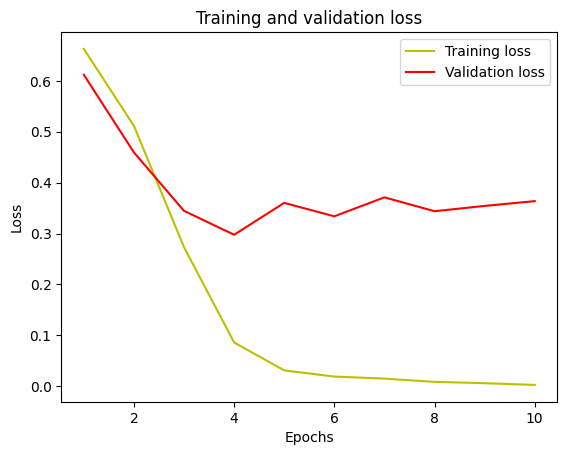

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

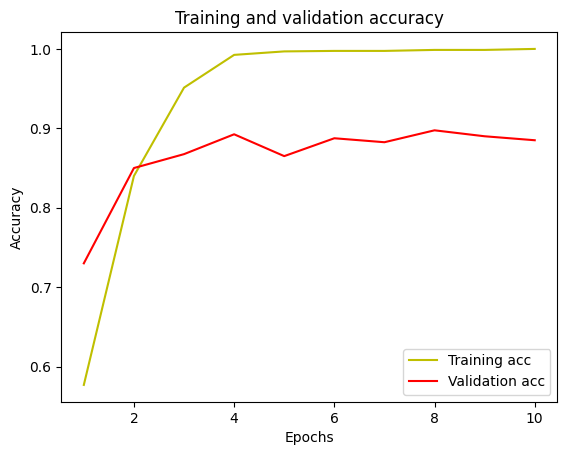

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()